# **Unveiling the World of OCR**

## **What is OCR?**

- "OCR" stands for `Optical Character Recognition` or `text recognition`

Optical Character Recognition (OCR) has become a game-changer in transforming images of text into machine-encoded text. Several tools and libraries have emerged to facilitate OCR, and in this exploration, we'll delve into three popular ones:
>> ### -  **Keras OCR**
>> ### -  **Easy OCR**
>> ### -  **PyTesseract**

- OCR can be implemented using the CRNN (Convolutional Recurrent Neural Network) architecture.
> - The CRNN architecture combines convolutional layers for feature extraction, recurrent layers for sequence modeling, and connectionist temporal classification (CTC) for handling variable-length sequences.
> - Here's a brief explanation of how CRNN works in the context of OCR:

>> - Convolutional Layers (CNN):

The initial layers of the CRNN are typically convolutional layers, similar to those used in image classification tasks. These layers are responsible for extracting hierarchical features from the input image, enabling the network to capture patterns at different scales.
>> -  Recurrent Layers (RNN/LSTM/GRU):

Following the convolutional layers, recurrent layers are employed to model sequential dependencies in the data. This is crucial for recognizing text, which is inherently a sequential structure. Long Short-Term Memory (LSTM) or Gated Recurrent Unit (GRU) layers are commonly used for this purpose.
>> - Connectionist Temporal Classification (CTC):

CTC is a method used for sequence-to-sequence tasks where the input and output sequences may have different lengths. In OCR, CTC helps align the predicted sequence of characters with the ground truth text, allowing the model to handle variable-length words and characters.

# **Approach - 1 Keras OCR**

In [1]:
# To install from master
!pip install git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr -q


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
# To install from PiPy
#!pip install keras-ocr -q


In [3]:
import keras_ocr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import cv2

## **Build a Keras_ocr Pipeline**

In [4]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [5]:
img1 ='https://theadfocus.com/wp-content/uploads/2020/05/Digital-Billboard-Denver-2048x1366.jpg'
img2= 'https://sanjosespotlight.s3.us-east-2.amazonaws.com/wp-content/uploads/2022/08/11174503/BILLBOARDLAWSUIT-1-scaled.jpg'
img3 ='/content/HTR.jpg'
img4= '/content/20231210_022318.jpg'

In [6]:
images = [keras_ocr.tools.read(img) for img in[img1,img2, img3,img4]]

In [7]:
# Each list of predictions in result is a list of (word, box) tuples.
result = pipeline.recognize(images)

3/3 [==============================] - 5s 528ms/step


In [8]:
result[0][:5]

[('polsinell',
  array([[1398.8407  ,   88.624695],
         [1543.9711  ,   53.59323 ],
         [1550.4677  ,   80.50784 ],
         [1405.3373  ,  115.53931 ]], dtype=float32)),
 ('8',
  array([[1550.,  122.],
         [1572.,  122.],
         [1572.,  142.],
         [1550.,  142.]], dtype=float32)),
 ('american',
  array([[1669.4674 ,  308.55756],
         [1847.8754 ,  304.50287],
         [1848.4979 ,  331.89783],
         [1670.09   ,  335.9525 ]], dtype=float32)),
 ('great',
  array([[1554.,  310.],
         [1658.,  310.],
         [1658.,  334.],
         [1554.,  334.]], dtype=float32)),
 ('festivail',
  array([[1664.,  334.],
         [1852.,  334.],
         [1852.,  372.],
         [1664.,  372.]], dtype=float32))]

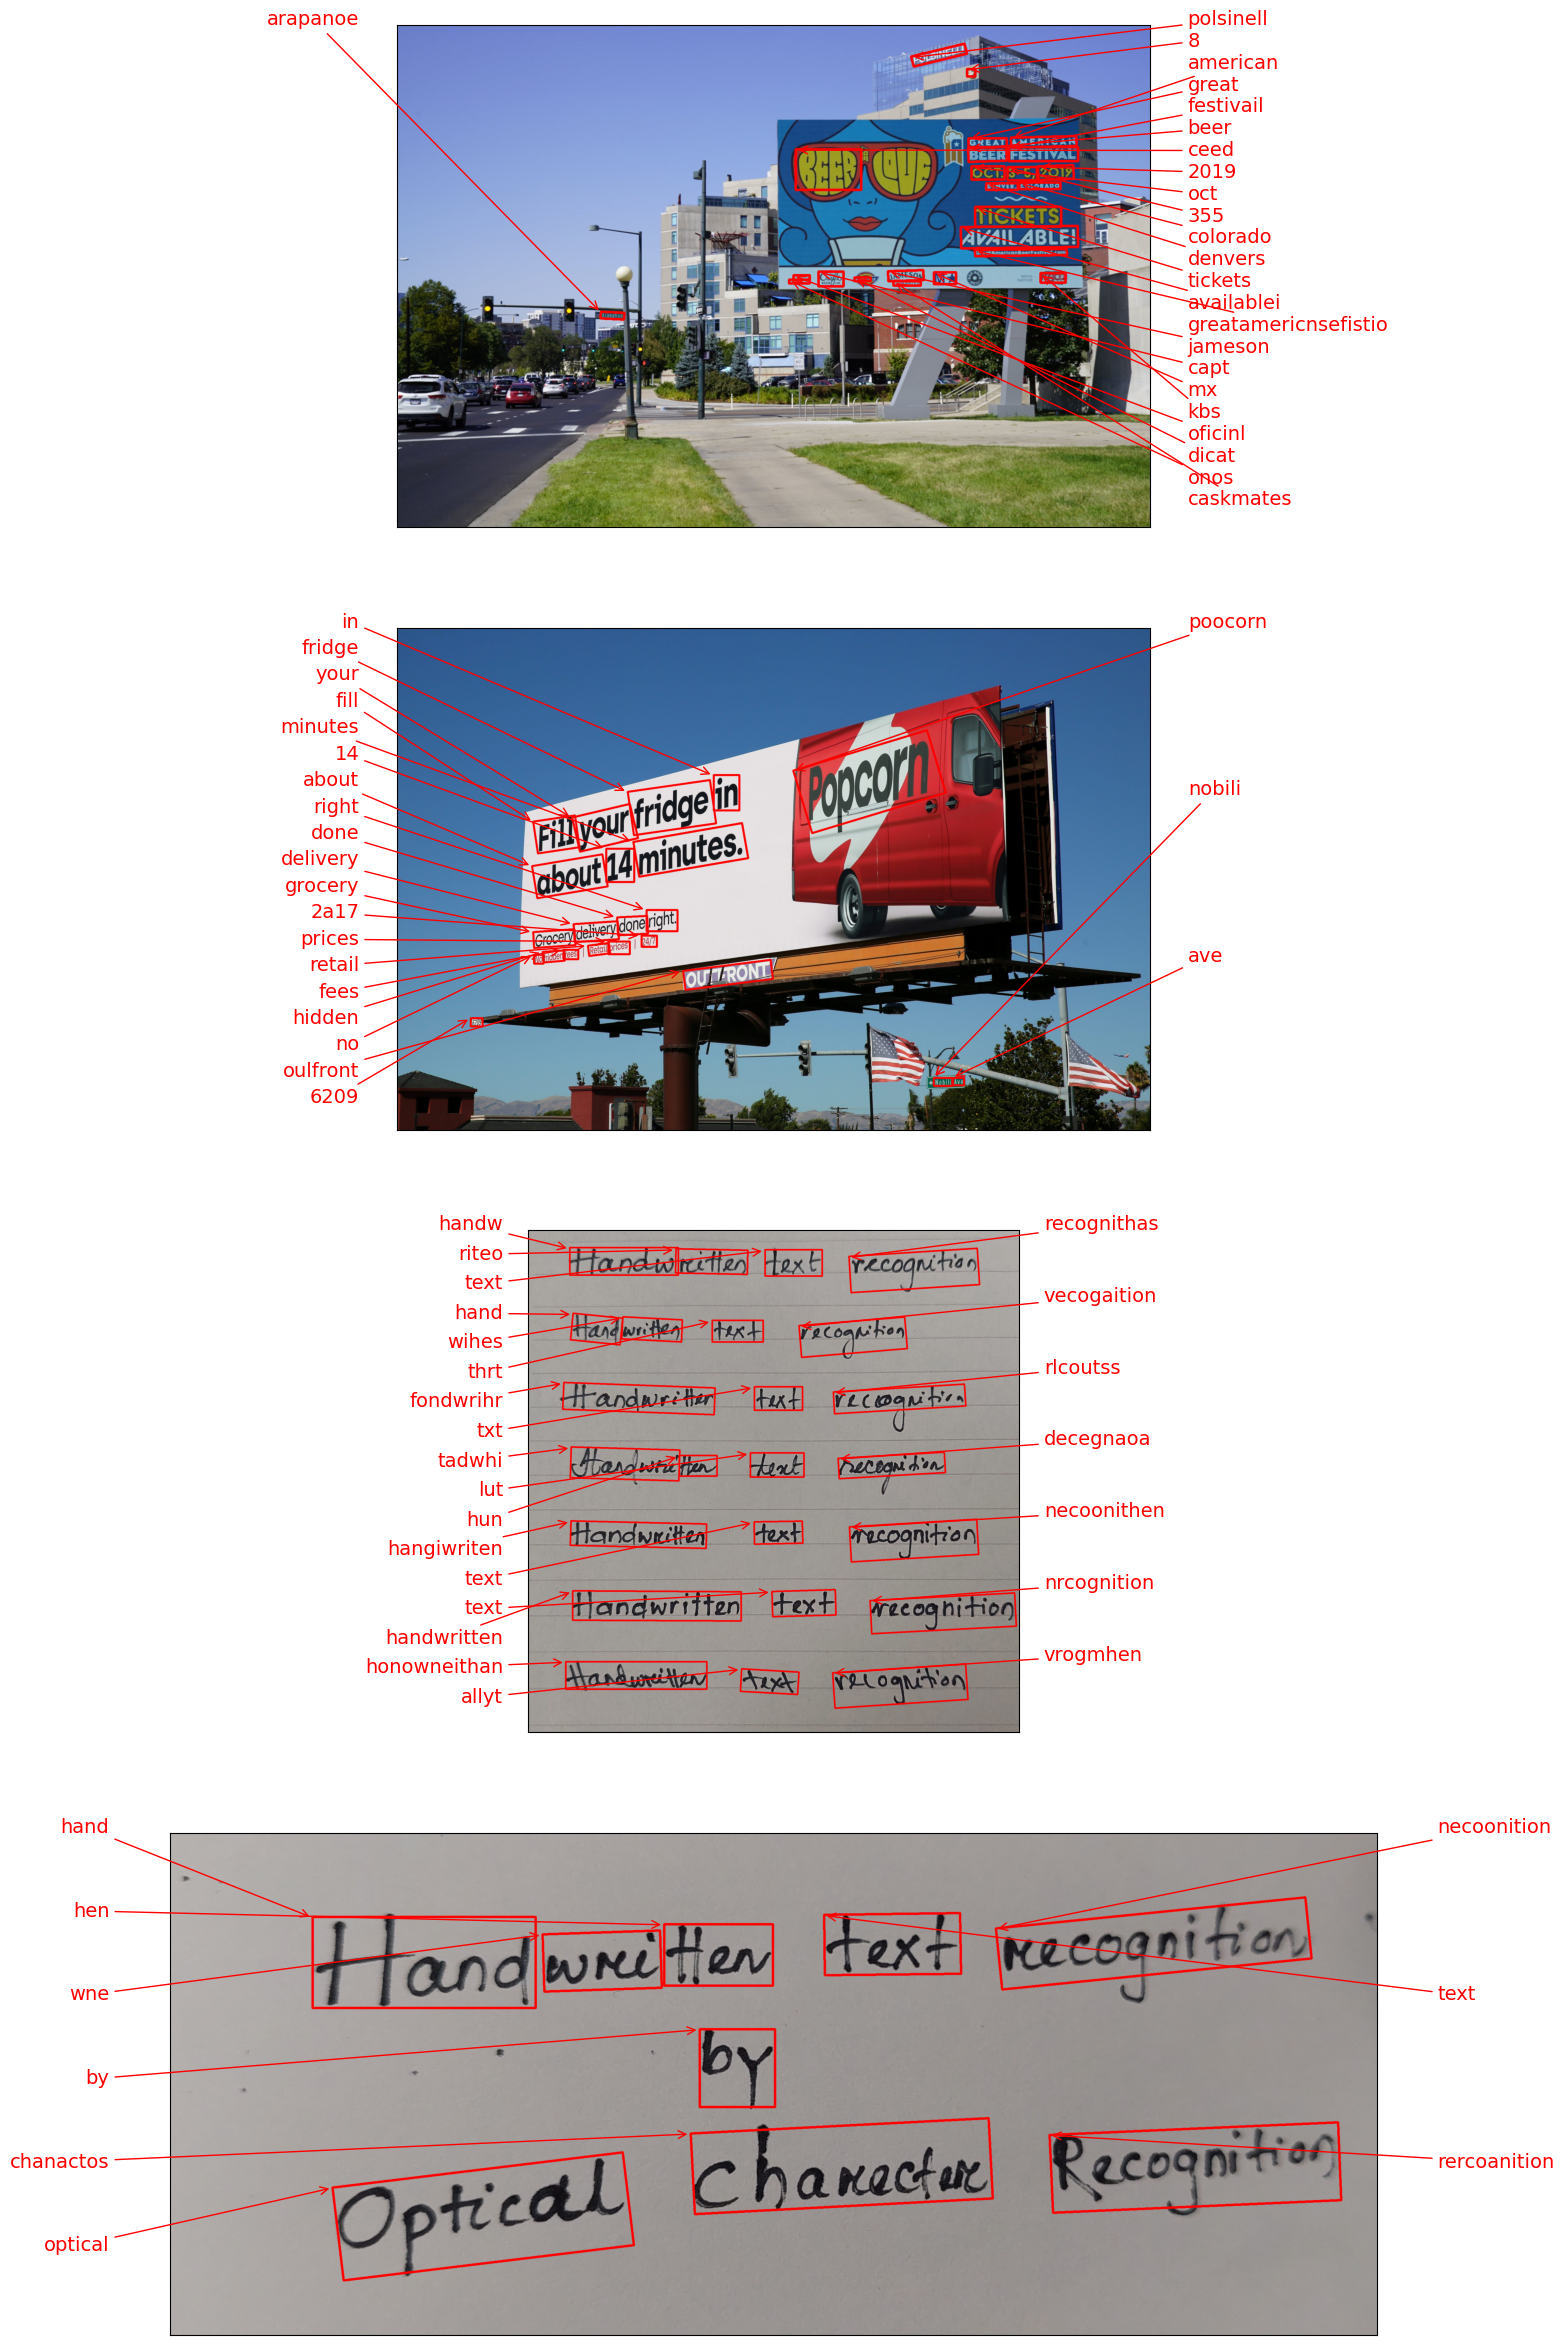

In [9]:
fig, axs = plt.subplots(nrows =len(images), figsize =(30,30))
for ax, image, prediction in zip(axs, images, result):
  keras_ocr.tools.drawAnnotations(image = image, predictions = prediction, ax= ax)

## **Text Extracted from Image**

In [10]:
predicted_image = result[1]
for text, box in predicted_image:
    print(text)

poocorn
in
fridge
your
fill
minutes
14
about
right
done
delivery
grocery
2a17
prices
retail
fees
hidden
no
oulfront
6209
nobili
ave


In [11]:
predicted_image = result[2]
for text, box in predicted_image:
    print(text)

handw
riteo
text
recognithas
hand
wihes
vecogaition
thrt
fondwrihr
rlcoutss
txt
tadwhi
lut
decegnaoa
hun
hangiwriten
text
necoonithen
text
handwritten
nrcognition
honowneithan
vrogmhen
allyt


In [12]:
detector = keras_ocr.detection.Detector()
recognizer = keras_ocr.recognition.Recognizer(weights ='kurapan' )
pipeline = keras_ocr.pipeline.Pipeline(detector = detector, recognizer = recognizer)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [13]:
result = pipeline.recognize(images)

3/3 [==============================] - 3s 69ms/step


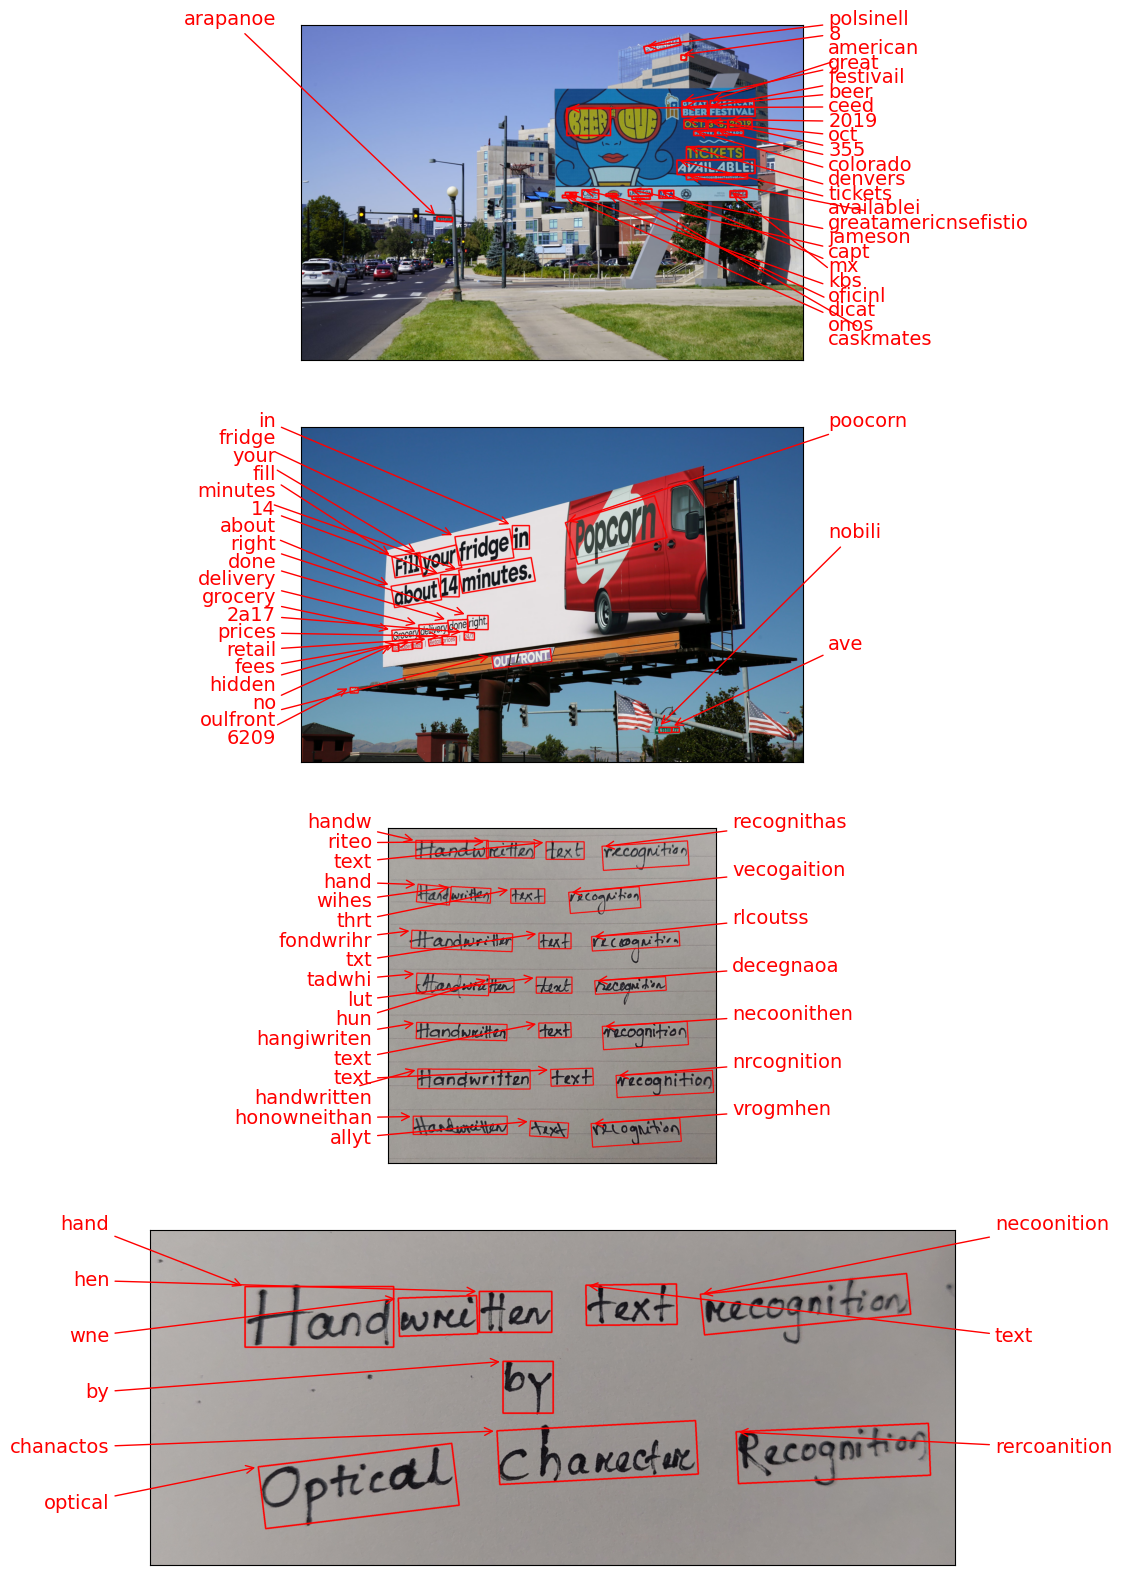

In [14]:
fig, axs = plt.subplots(nrows =len(images), figsize =(20,20))
for ax, image, prediction in zip(axs, images, result):
  keras_ocr.tools.drawAnnotations(image = image, predictions = prediction, ax= ax)

In [15]:
predicted_image = result[1]
for text, box in predicted_image:
    print(text)

poocorn
in
fridge
your
fill
minutes
14
about
right
done
delivery
grocery
2a17
prices
retail
fees
hidden
no
oulfront
6209
nobili
ave


In [16]:
predicted_image = result[3]
for text, box in predicted_image:
    print(text)

necoonition
text
hand
hen
wne
by
rercoanition
chanactos
optical


# **Approach -2 pytesseract**

In [17]:
!apt-get install -y tesseract-ocr
!pip install pytesseract -q


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


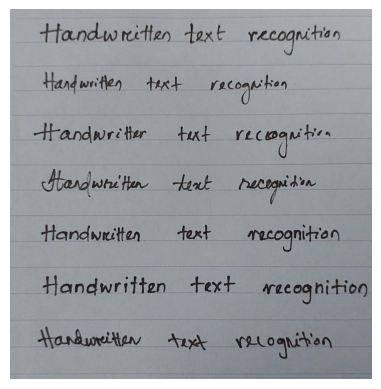

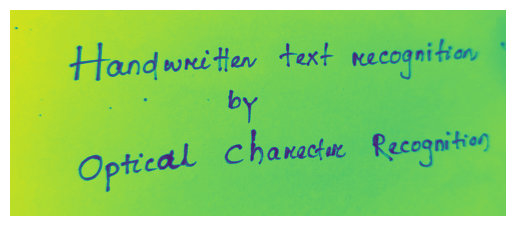

In [18]:

import pytesseract

# Upload your image to Colab
from google.colab import files
#uploaded = files.upload()

# Get the file name
image_path =  '/content/HTR.jpg' #list(uploaded.keys())[0]
img = cv2.imread(image_path)
plt.imshow(img)
#text = pytesseract.image_to_string(img, lang ='eng')
# Load the image
# image = cv2.imread(image_path)
# plt.imshow(img)
plt.axis('off')
plt.show()

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)
plt.axis('off')
plt.show()



## **Text Extracted from Image**

In [19]:
# Perform OCR using pytesseract
text = pytesseract.image_to_string(gray_image, lang ='eng')

# Print the recognized text
print("Recognized Text:")
print(text)

Recognized Text:
A ory
ae.
text we
Hand sii a

£

: e 9 oh)
eae
a »
a C
410
|



In [20]:
img2 = cv2.imread(img4)
gray_img1 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
text = pytesseract.image_to_string(gray_img1, lang ='eng')

# Print the recognized text
print("Recognized Text:")
print(text)

Recognized Text:
ition
coqr
text we
Hand a

£

> eo )
ac
a »
Es
410
|



# **Approach-3 EasyOCR**

In [21]:
!pip install easyocr -q

In [22]:
import easyocr


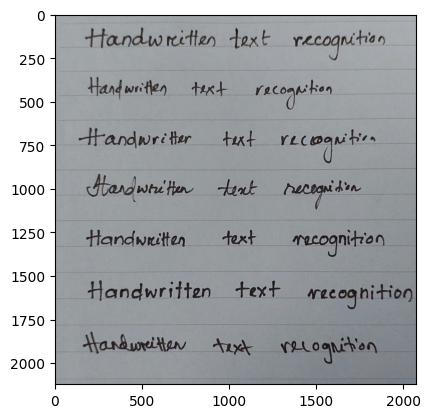

In [23]:
reader = easyocr.Reader(['en'],gpu= False)
img= cv2.imread('/content/HTR.jpg')
plt.imshow(img)
result = reader.readtext(img)


## **Text Extracted from Image**

In [24]:
easyocr_df = pd.DataFrame(result, columns=['bbox', 'text', 'conf'])
easyocr_df

bbox          text      conf
0      [[165, 67], [939, 67], [939, 205], [165, 205]]   ttandwiiten  0.661826
1    [[989, 75], [1251, 75], [1251, 211], [989, 211]]          text  0.476418
2   [[1335, 60], [1926, 60], [1926, 294], [1335, 2...   rccoguitian  0.404896
3    [[383, 356], [661, 356], [661, 485], [383, 485]]        wrflen  0.520714
4    [[769, 377], [997, 377], [997, 485], [769, 485]]            tt  0.721606
5   [[1124, 350], [1619, 350], [1619, 562], [1124,...     racoatkon  0.406790
6    [[134, 633], [803, 633], [803, 798], [134, 798]]  #tandwri ter  0.346638
7   [[947, 657], [1165, 657], [1165, 773], [947, 7...          text  0.320729
8   [[1277, 644], [1859, 644], [1859, 792], [1277,...      rl(@qb'^  0.104696
9   [[164, 906], [811, 906], [811, 1065], [164, 10...    cHeswtu'tu  0.077677
10  [[927, 935], [1178, 935], [1178, 1057], [927, ...           dak  0.269687
11  [[1298, 931], [1771, 931], [1771, 1063], [1298...   becean' Kb4  0.196820
12  [[169, 1223], [762, 1223], [762, 1351], [169, ...    Handwitten  0.719298
13  [[941, 1220], [1170, 1220], [1170, 1341], [941...          text  0.920032
14  [[1338, 1205], [1920, 1205], [1920, 1424], [13...   recognition  0.349851
15  [[175, 1513], [912, 1513], [912, 1663], [175, ...   Handwritten  0.580439
16  [[1020, 1511], [1309, 1511], [1309, 1646], [10...          text  0.849795
17  [[1426, 1518], [2076, 1518], [2076, 1722], [14...   recoghition  0.541766
18  [[149, 1815], [769, 1815], [769, 1953], [149, ...    Handueitav  0.426344
19  [[885, 1844], [1151, 1844], [1151, 1976], [885...           4xt  0.835551
20  [[1268, 1819], [1873, 1819], [1873, 2038], [12...      relogitn  0.297273
21  [[188.85188817886794, 337.04124568626435], [41...           Hat  0.519234

In [25]:
easyocr_df['text']. values

array(['ttandwiiten', 'text', 'rccoguitian', 'wrflen', 'tt', 'racoatkon',
       '#tandwri ter', 'text', "rl(@qb'^", "cHeswtu'tu", 'dak',
       "becean' Kb4", 'Handwitten', 'text', 'recognition', 'Handwritten',
       'text', 'recoghition', 'Handueitav', '4xt', 'relogitn', 'Hat'],
      dtype=object)

**OCR Behaviors:** Not all OCR solutions are created equal! Different OCR libraries exhibit varying performances on different images. Through extensive testing, KerasOCR has emerged as the top performer, consistently delivering accurate and reliable results. However for accurate recognition of handwritten text, improvement in the model is required.